In [1]:
import quanguru as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

ModuleNotFoundError: No module named 'quanguru'

# Single Qubit Evolution

Single qubit Hamiltonian is:

$\large\hat{H}=\frac{w_{q}}{2}\hat{\sigma}_{z}$


Unitary time evolution operator $|\psi(t)\rangle=U(t)|\psi(0)\rangle \rightarrow i \frac{d}{d t} U(t)=\hat{H} u(t)$

$U(t)=e^{-i \hat{H} t}$

$U(t)=\left[\begin{array}{ll}e^{-i \omega_{0} t / 2} & 0 \\ 0 & e^{i \omega_{q} t / 2}\end{array}\right]$

# Master equation

$\dot{\hat{\rho}}=\hat{\mathcal{L}} \hat{\rho}=-i\left[\hat{H}_{1} \hat{p}\right]+\sum_{i=1}^{n-1} k_{i}\left(\hat{F}_{i} \hat{p} F_{i}^{+}-\frac{1}{2}\left\{\hat{F}_{i}^{+} \hat{F}_{i}, \hat{\rho}\right\}\right)$

In [2]:
frequency = 1
initialC0real = 0.5
initialC0imag = 0.5
initialC1real = 0.5
initialC1imag = 0.5

initialC0 = (initialC0real + 1j*initialC0imag)/((initialC0real**2) + (initialC0imag**2))
initialC1 = (initialC1real + 1j*initialC1imag)/((initialC1real**2) + (initialC1imag**2))

sz = qt.sigmaz()
sy = qt.sigmay()
sx = qt.sigmax()

ket1 = qt.basis(2, 0)
ket0 = qt.basis(2, 1)

qubitHamiltonian = 0.5*frequency*sz

initialState = qt.superPos(2, {0: initialC1, 1: initialC0}, populations=False)
initialC0 = initialState.A[1][0]
initialC1 = initialState.A[0]

In [3]:
analyticalC0 = lambda t : initialC0*(np.e**(0.5*2*np.pi*1j*frequency*t))
analyticalC1 = lambda t : initialC1*(np.e**(-0.5*2*np.pi*1j*frequency*t))

expectationsAnalytic = {'sz':[], 'sx':[], 'sy':[]}
sxExpectation1 = lambda t: 2*(np.conj(initialC0)*initialC1*np.e**(-1j*2*np.pi*frequency*t)).real
szExpectation2 = (abs(initialC1)**2) - (abs(initialC0)**2)

In [4]:
stepSize = 0.01
finalTime = 2 + stepSize
stepCount = int(finalTime / stepSize)

unitaryEvolution = qt.Unitary(2*np.pi*qubitHamiltonian, stepSize)
stepDiff = -1j*2*np.pi*qubitHamiltonian*stepSize

In [5]:
numericalTimeC_0real = []
numericalTimeC_0imag = []
numericalTimeC_1real = []
numericalTimeC_1imag = []

szExpectation = []
sxExpectation = []
syExpectation = []

state = initialState
for i in range(stepCount):
    ct1 = qt.innerProd(state, ket1) # <ket1|state> ordering is important
    ct0 = qt.innerProd(state, ket0)

    numericalTimeC_0real.append(ct0.real)
    numericalTimeC_0imag.append(ct0.imag)

    numericalTimeC_1real.append(ct1.real)
    numericalTimeC_1imag.append(ct1.imag)

    szExpectation.append(qt.expectation(sz, state))
    syExpectation.append(qt.expectation(sy, state))
    sxExpectation.append(qt.expectation(sx, state))

    expectationsAnalytic['sx'].append(sxExpectation1(i*stepSize))
    expectationsAnalytic['sz'].append(szExpectation2)

    state = unitaryEvolution @ state
    #state += stepDiff @ state

In [6]:
timeList = [i*stepSize for i in range(stepCount)]

C_0Analytical = [analyticalC0(i*stepSize) for i in range(stepCount)]
C_0Analyticalr = [c.real for c in C_0Analytical]
C_0Analyticali = [c.imag for c in C_0Analytical]

C_1Analytical = [analyticalC1(i*stepSize) for i in range(stepCount)]
C_1Analyticalr = [c.real for c in C_1Analytical]
C_1Analyticali = [c.imag for c in C_1Analytical]

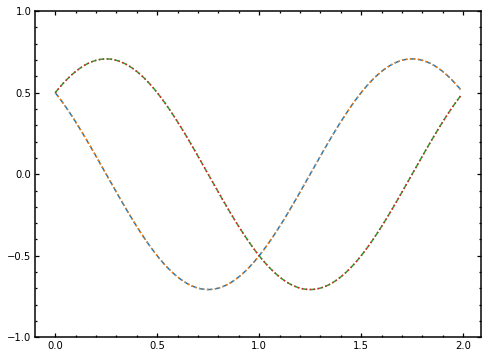

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(timeList, numericalTimeC_0real, linestyle='--')
ax.plot(timeList, C_0Analyticalr, linestyle=':')

ax.plot(timeList, numericalTimeC_0imag, linestyle='--')
ax.plot(timeList, C_0Analyticali, linestyle=':')

ax.set_xticks([0.0, 0.5, 1.0, 1.5, 2.0])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1])

ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

ax.tick_params(direction='in', which='both')
ax.tick_params(bottom=True, top=True, left=True, right=True, which='both')

ax.tick_params(length=4, width=1.25)
ax.tick_params(length=2, width=1.25, which='minor')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

plt.show()

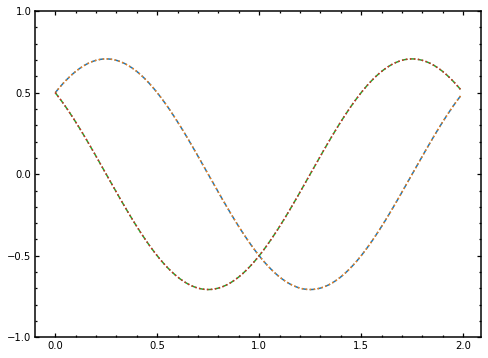

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(timeList, numericalTimeC_1real, linestyle='--')
ax.plot(timeList, C_1Analyticalr, linestyle=':')

ax.plot(timeList, numericalTimeC_1imag, linestyle='--')
ax.plot(timeList, C_1Analyticali, linestyle=':')

ax.set_xticks([0.0, 0.5, 1.0, 1.5, 2.0])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1])

ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

ax.tick_params(direction='in', which='both')
ax.tick_params(bottom=True, top=True, left=True, right=True, which='both')

ax.tick_params(length=4, width=1.25)
ax.tick_params(length=2, width=1.25, which='minor')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

plt.show()

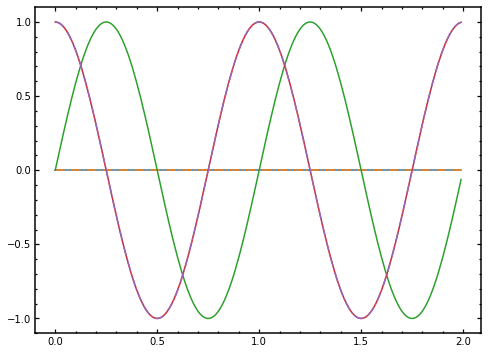

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
#fig, ax = plt.subplots(figsize=cm2inch(8, 6))

ax.plot(timeList, szExpectation)
ax.plot(timeList, expectationsAnalytic['sz'], '-.')
ax.plot(timeList, syExpectation)
ax.plot(timeList, sxExpectation)
ax.plot(timeList, expectationsAnalytic['sx'], '-.')

ax.set_xticks([0.0, 0.5, 1.0, 1.5, 2.0])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1])

ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

ax.tick_params(direction='in', which='both')
ax.tick_params(bottom=True, top=True, left=True, right=True, which='both')

ax.tick_params(length=4, width=1.25)
ax.tick_params(length=2, width=1.25, which='minor')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

plt.show()

In [10]:
import qutip

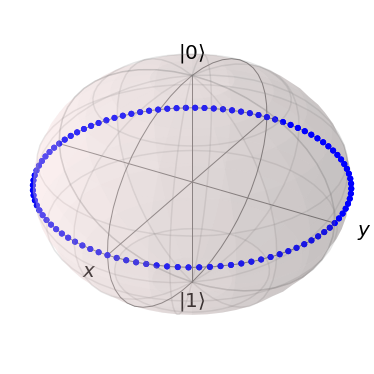

In [11]:
b = qutip.Bloch()
b.add_points([sxExpectation, syExpectation, szExpectation])
b.show()